In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

os.getcwd()

'/home/zack/personal/prediction_market_tools'

In [2]:
import pandas as pd

In [3]:
p = pd.read_csv("data/raw/predsnprices.csv")

In [4]:
from src import expected_value

In [5]:
p, latest_p = expected_value.prep_prices_csv(p)

/home/zack/personal/prediction_market_tools/src/expected_value.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_p["buyYes"] = latest_p.myBet > latest_p.yesPrice
/home/zack/miniconda3/envs/preds/lib/python3.9/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/zack/personal/prediction_market_tools/src/expected_value.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [6]:
latest_p

,symbol,date,yesPrice,noPrice,myBet,purchase,qty,Unnamed: 7,Unnamed: 8,Unnamed: 9,age,buyYes,mktp,myp,mktq,myq,expected_value
9,CASE-038,2021-09-14 00:00:00-04:00,0.07,0.95,0.05,NaN,NaN,NaN,NaN,NaN,317 days 10:32:53.312530,False,0.95,0.95,0.05,0.05,0.00
14,CASE-039,2021-09-15 00:00:00-04:00,0.06,NaN,0.05,NaN,NaN,NaN,NaN,NaN,316 days 10:32:53.312530,False,NaN,0.95,NaN,0.05,NaN
16,CASE-040,2021-09-16 00:00:00-04:00,0.98,0.03,1.00,NaN,NaN,NaN,NaN,NaN,315 days 10:32:53.312530,True,0.98,1.00,0.02,0.00,0.02
18,WKCASE-004,2021-09-16 00:00:00-04:00,0.99,0.02,1.00,NaN,NaN,NaN,NaN,NaN,315 days 10:32:53.312530,True,0.99,1.00,0.01,0.00,0.01
20,CASE-041,2021-09-17 00:00:00-04:00,0.50,0.50,0.70,NaN,NaN,NaN,NaN,NaN,314 days 10:32:53.312530,True,0.50,0.70,0.50,0.30,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,VARIANT-007,2021-12-16 00:00:00-05:00,0.72,0.31,0.55,NaN,NaN,NaN,NaN,NaN,224 days 09:32:53.312530,False,0.31,0.45,0.69,0.55,0.14
265,VARIANT-006,2021-12-16 00:00:00-05:00,0.95,0.07,0.85,NaN,NaN,NaN,NaN,NaN,224 days 09:32:53.312530,False,0.07,0.15,0.93,0.85,0.08
266,MTA-023,2021-12-16 00:00:00-05:00,0.23,0.81,0.30,NaN,NaN,NaN,NaN,NaN,224 days 09:32:53.312530,True,0.23,0.30,0.77,0.70,0.07
267,LCASE-005,2021-12-16 00:00:00-05:00,0.55,0.49,0.45,NaN,NaN,NaN,NaN,NaN,224 days 09:32:53.312530,False,0.49,0.55,0.51,0.45,0.06


In [7]:
from src import kalshi

In [8]:
k = kalshi.Kalshi()

In [9]:
k.login()

In [10]:
positions = k.get_open_positions()
positions

KeyError: 'market'

In [ ]:
positions = kalshi.merge_bets_into_postions(positions, latest_p)

In [ ]:
positions

,user_id,market_id,position,position_cost,resting_orders_count,total_cost,realized_pnl,fees_paid,volume,final_position,final_position_cost,qty,id,ticker_name,last_price,status,mrkt_prob,symbol,myBet
0,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,4dd57553-dd3c-4308-a284-9b319c5cce60,-100,91.00,0,9100,0,58,100,0,0,100,4dd57553-dd3c-4308-a284-9b319c5cce60,LCASE-002,0.01,active,0.99,LCASE-002,0.99
1,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,2f485e17-27ac-4337-ad04-d63a9fc578ad,-98,64.68,0,6468,0,154,98,0,0,98,2f485e17-27ac-4337-ad04-d63a9fc578ad,VOHC-001,0.24,active,0.76,VOHC-001,0.85
2,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,539b6ac1-5cf1-4cba-976c-01a636c6913a,-352,177.76,0,17776,0,521,352,0,0,352,539b6ac1-5cf1-4cba-976c-01a636c6913a,VAXX-006,0.03,active,0.97,VAXX-006,0.95
3,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,58fe7d64-2fd9-4a74-8ead-fcb282458dd3,100,68.00,0,6800,0,153,100,0,0,100,58fe7d64-2fd9-4a74-8ead-fcb282458dd3,CASELOW-001,0.75,active,0.75,CASELOW-001,0.75
4,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,149b0c78-74a2-45ef-9b93-995b45362b24,15,8.15,0,5800,1914,218,153,0,0,15,149b0c78-74a2-45ef-9b93-995b45362b24,KIDVAX-001,0.95,active,0.95,KIDVAX-001,0.95
5,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,36a3cedf-a3bd-4131-98cb-0cecdc77fcfc,-15,8.85,0,885,0,26,15,0,0,15,36a3cedf-a3bd-4131-98cb-0cecdc77fcfc,MEAD-001,0.56,active,0.44,MEAD-001,0.75
6,46ef47c2-585e-49e6-a0b2-d1fdd1f18ff4,f7a76e6f-8744-460e-ac08-9ee9ec146394,-50,22.98,0,2298,0,88,50,0,0,50,f7a76e6f-8744-460e-ac08-9ee9ec146394,PLANET-001,0.99,active,0.01,PLANET-001,0.55


In [ ]:
mkt_exp, mkt_situations = expected_value.compute_wager_expectations(
    positions.mrkt_prob, positions.position_cost, positions.qty,
)

# Market Expectation

In [ ]:
mkt_exp

169.84999999999994

In [ ]:
mkt_situations

,hits,hit_percent,hits_p,hits_exp
0,0,0.000000,4.989600e-07,-441.420000
1,1,0.142857,7.848432e-05,-300.354852
2,2,0.285714,3.371693e-03,-125.497682
3,3,0.428571,5.122042e-02,4.527573
4,4,0.571429,2.528283e-01,105.576209
5,5,0.714286,4.590881e-01,190.725085
6,6,0.857143,2.311246e-01,238.626703
7,7,1.000000,2.288011e-03,288.580000


# My Expectation

In [ ]:
my_exp, my_situations = expected_value.compute_wager_expectations(
    positions.myBet, positions.position_cost, positions.qty,
)

In [ ]:
my_exp

203.27999999999997

In [ ]:
my_situations

,hits,hit_percent,hits_p,hits_exp
0,0,0.000000,1.054688e-07,-441.420000
1,1,0.142857,1.580859e-05,-322.435567
2,2,0.285714,6.271211e-04,-179.675670
3,3,0.428571,1.021232e-02,-46.802532
4,4,0.571429,7.498463e-02,59.793396
5,5,0.714286,2.617616e-01,147.388301
6,6,0.857143,4.174424e-01,222.804385
7,7,1.000000,2.349560e-01,288.580000


In [ ]:
my_situations.hits_p.cumsum()

0    1.054688e-07
1    1.591406e-05
2    6.430352e-04
3    1.085536e-02
4    8.583999e-02
5    3.476016e-01
6    7.650440e-01
7    1.000000e+00
Name: hits_p, dtype: float64

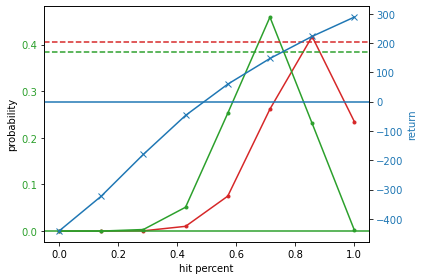

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = "tab:red"
ax1.set_xlabel("hit percent")
ax1.set_ylabel("probability")
ax1.plot(my_situations.hit_percent, my_situations.hits_p, color=color, marker=".")
ax2.axhline(y=my_exp, color=color, linestyle="--")
color = "tab:green"
ax1.plot(mkt_situations.hit_percent, mkt_situations.hits_p, color=color, marker=".")
ax2.axhline(y=mkt_exp, color=color, linestyle="--")
ax1.axhline(y=0, color=color)
ax1.tick_params(axis="y", labelcolor=color)

color = "tab:blue"
ax2.set_ylabel("return", color=color)  # we already handled the x-label with ax1
ax2.plot(my_situations.hit_percent, my_situations.hits_exp, color=color, marker="x")
ax2.axhline(y=0, color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()